# Egzaminas

### Klausimai

1. Kas yra masyvai? Kam jie naudojami?

2. Kas yra žodynai, kuo jie skiriasi nuo masyvų?

3. Kaip versle gali būti panaudojama duomenų analitika naudojant Python?

4. Kuo skiriasi for ir while ciklai, kada kuris naudojamas?

5. Kam naudojamos Python funkcijos?

6. Kas yra Python bibliotekos? Kam jos naudojamos?

7. Išvardinkite 5 svarbias Python bibliotekas bei trumpai apibūdinkite kiekvieną iš jų?

### Užduotis

1. Naudojant `pandas` biblioteką nuskaitykite duotą duomenų failą ir atvaizduokite duomenis.

In [1]:
import pandas as pd

df = pd.read_csv('Kotryna.csv', encoding='utf-8')
df.head()

,Vardas,Pavardė,Matematika,Fizika,Biologija,Chemija,Istorija,Geografija,Lietuvių kalba,Anglų kalba,Informatika,Ekonomika,Kūno kultūra,Muzika,Dailė,Technologijos
0,Arvydas,Jankauskas,10,5,5,5,9,9,4,5,4,4,5,9,5,9
1,Izabelė,Žilinskaitė,6,9,8,5,10,5,8,9,4,5,5,6,4,7
2,Miglė,Petrauskaitė,6,5,9,8,9,4,6,8,9,5,5,8,7,7
3,Motiejus,Jankauskas,10,9,9,9,9,9,9,9,9,10,10,10,10,9
4,Ona,Savickaitė,8,5,9,7,8,7,6,8,8,9,4,4,9,8


2. Pridėkite naują stulpelį `Vidurkis` ir suskaičiuokite kiekvieno studento vidurkį bei suapvalinkit iki vieno skaičiaus po kablelio.

In [173]:
df['Vidurkis'] = df.iloc[:, 2:].mean(axis=1).round(1)
df



,Vardas,Pavardė,Matematika,Fizika,Biologija,Chemija,Istorija,Geografija,Lietuvių kalba,Anglų kalba,Informatika,Ekonomika,Kūno kultūra,Muzika,Dailė,Technologijos,Vidurkis
0,Arvydas,Jankauskas,10,5,5,5,9,9,4,5,4,4,5,9,5,9,6.3
1,Izabelė,Žilinskaitė,6,9,8,5,10,5,8,9,4,5,5,6,4,7,6.5
2,Miglė,Petrauskaitė,6,5,9,8,9,4,6,8,9,5,5,8,7,7,6.9
3,Motiejus,Jankauskas,10,9,9,9,9,9,9,9,9,10,10,10,10,9,9.4
4,Ona,Savickaitė,8,5,9,7,8,7,6,8,8,9,4,4,9,8,7.1
5,Paulius,Jankauskas,8,4,6,5,7,10,8,8,4,6,8,4,9,9,6.9
6,Renata,Savickaitė,8,8,8,9,8,10,9,8,8,9,9,10,9,10,8.8
7,Robertas,Žukauskas,5,10,4,10,10,5,5,9,10,5,10,9,8,10,7.9
8,Tajus,Jankauskas,8,9,8,8,10,10,9,9,9,10,10,9,9,9,9.1
9,Urtė,Stankevičiutė,10,4,10,7,7,6,6,6,4,5,9,4,8,9,6.8


3. Suraskite ir atspausdinkite geriausio studento vardą ir pavardę bei jo vidurkį.


In [22]:
top_studentas_df = df.sort_values(by= 'Vidurkis', ascending= False).head(1)

print(top_studentas_df['Vardas'].iloc[0], top_studentas_df['Pavardė'].iloc[0], round(top_studentas_df['Vidurkis'].iloc[0], 1))


Motiejus Jankauskas 8.7


4. Atvaizduokite studentus horizontalia stulpeline diagrama pagal jų vidurkius mažėjimo tvarka. Diagramoje turėtų matytis studento vardas ir pavardė.

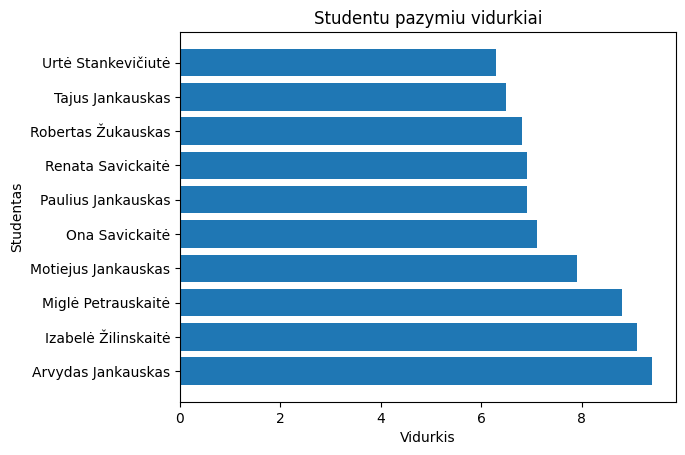

In [174]:
import matplotlib.pyplot as plt

df_vidurkis_mazejimo = df.sort_values(by= 'Vidurkis', ascending= False)
vidurkiai_mazejimo = df_vidurkis_mazejimo['Vidurkis']
vardas_pavarde = df['Vardas'] + ' ' + df['Pavardė']

plt.barh(vardas_pavarde, vidurkiai_mazejimo)
plt.title('Studentu pazymiu vidurkiai')
plt.xlabel('Vidurkis')
plt.ylabel('Studentas')
plt.show()


5. Sukurkite funkciją `stipendija_pagal_vidurki`, kuri priimtų studento vidurkį (kaip argumentą) ir grąžintų jam skirtos stipendijos dydį pagal jo vidurkį.
    * Kai vidurkis didesnis arba lygus 9.5 stipendija 200
    * Kai vidurkis didesnis arba lygus 9.0, bet mažesnis už 9.5 stipendija 180
    * Kai vidurkis didesnis arba lygus 8.5, bet mažesnis už 9.0 stipendija 100
    * Jei vidurkis mažesnis už 8.5 studentas stipendijos negauna


In [175]:
def stipendija_pagal_vidurki(vidurkis):
    if vidurkis >= 9.5:
        return 200
    elif vidurkis >= 9.0 and vidurkis < 9.5:
        return 180
    elif vidurkis >= 8.5 and vidurkis < 9.0:
        return 100
    else:
        return 0
        


6. Pridėkite naują stulpelį `Stipendija` ir stulpelį užpildykite duomenimis naudodami funkciją `stipendija_pagal_vidurki` pagal studento vidirkį.

In [177]:
df['Stipendija'] = df['Vidurkis'].apply(stipendija_pagal_vidurki)
df


,Vardas,Pavardė,Matematika,Fizika,Biologija,Chemija,Istorija,Geografija,Lietuvių kalba,Anglų kalba,Informatika,Ekonomika,Kūno kultūra,Muzika,Dailė,Technologijos,Vidurkis,Stipendija
0,Arvydas,Jankauskas,10,5,5,5,9,9,4,5,4,4,5,9,5,9,6.3,0
1,Izabelė,Žilinskaitė,6,9,8,5,10,5,8,9,4,5,5,6,4,7,6.5,0
2,Miglė,Petrauskaitė,6,5,9,8,9,4,6,8,9,5,5,8,7,7,6.9,0
3,Motiejus,Jankauskas,10,9,9,9,9,9,9,9,9,10,10,10,10,9,9.4,180
4,Ona,Savickaitė,8,5,9,7,8,7,6,8,8,9,4,4,9,8,7.1,0
5,Paulius,Jankauskas,8,4,6,5,7,10,8,8,4,6,8,4,9,9,6.9,0
6,Renata,Savickaitė,8,8,8,9,8,10,9,8,8,9,9,10,9,10,8.8,100
7,Robertas,Žukauskas,5,10,4,10,10,5,5,9,10,5,10,9,8,10,7.9,0
8,Tajus,Jankauskas,8,9,8,8,10,10,9,9,9,10,10,9,9,9,9.1,180
9,Urtė,Stankevičiutė,10,4,10,7,7,6,6,6,4,5,9,4,8,9,6.8,0


7. Atvaizduokite pie diagramoje stipendijų pasiskirstymą pagal studentus.

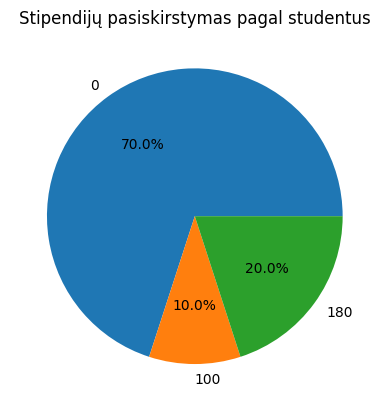

In [185]:
stipendija_sugrup = df.groupby('Stipendija'). size()
stipendija_sugrup
 
plt.pie(stipendija_sugrup, labels=stipendija_sugrup.index, autopct='%1.1f%%')
plt.title('Stipendijų pasiskirstymas pagal studentus')
plt.show()


8. Išsaugokite duomenis į duomenų bazę sukurdami lentelę `Studentai`.


In [183]:
from sqlalchemy import create_engine

db = create_engine("sqlite+pysqlite:///:memory:", echo=True)

df.to_sql('Studentai', db, if_exists='replace', index=False)



2024-07-13 12:22:09,848 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-13 12:22:09,851 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Studentai")
2024-07-13 12:22:09,852 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-13 12:22:09,853 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Studentai")
2024-07-13 12:22:09,853 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-13 12:22:09,854 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Studentai" (
	"Vardas" TEXT, 
	"Pavardė" TEXT, 
	"Matematika" BIGINT, 
	"Fizika" BIGINT, 
	"Biologija" BIGINT, 
	"Chemija" BIGINT, 
	"Istorija" BIGINT, 
	"Geografija" BIGINT, 
	"Lietuvių kalba" BIGINT, 
	"Anglų kalba" BIGINT, 
	"Informatika" BIGINT, 
	"Ekonomika" BIGINT, 
	"Kūno kultūra" BIGINT, 
	"Muzika" BIGINT, 
	"Dailė" BIGINT, 
	"Technologijos" BIGINT, 
	"Vidurkis" FLOAT, 
	"Stipendija" BIGINT
)


2024-07-13 12:22:09,854 INFO sqlalchemy.engine.Engine [no key 0.00022s] ()
2024-07-13 12:22:09,856 INFO sqlalchemy.engine.Engine INSERT INTO

10

In [58]:
df

,Vardas,Pavardė,Matematika,Fizika,Biologija,Chemija,Istorija,Geografija,Lietuvių kalba,Anglų kalba,Informatika,Ekonomika,Kūno kultūra,Muzika,Dailė,Technologijos,Vidurkis,Vardas_Pavarde,Stipendija
0,Arvydas,Jankauskas,10,5,5,5,9,9,4,5,4,4,5,9,5,9,5.866667,Arvydas Jankauskas,0
1,Izabelė,Žilinskaitė,6,9,8,5,10,5,8,9,4,5,5,6,4,7,6.066667,Izabelė Žilinskaitė,0
2,Miglė,Petrauskaitė,6,5,9,8,9,4,6,8,9,5,5,8,7,7,6.4,Miglė Petrauskaitė,0
3,Motiejus,Jankauskas,10,9,9,9,9,9,9,9,9,10,10,10,10,9,8.733333,Motiejus Jankauskas,100
4,Ona,Savickaitė,8,5,9,7,8,7,6,8,8,9,4,4,9,8,6.666667,Ona Savickaitė,0
5,Paulius,Jankauskas,8,4,6,5,7,10,8,8,4,6,8,4,9,9,6.4,Paulius Jankauskas,0
6,Renata,Savickaitė,8,8,8,9,8,10,9,8,8,9,9,10,9,10,8.2,Renata Savickaitė,0
7,Robertas,Žukauskas,5,10,4,10,10,5,5,9,10,5,10,9,8,10,7.333333,Robertas Žukauskas,0
8,Tajus,Jankauskas,8,9,8,8,10,10,9,9,9,10,10,9,9,9,8.466667,Tajus Jankauskas,0
9,Urtė,Stankevičiutė,10,4,10,7,7,6,6,6,4,5,9,4,8,9,6.333333,Urtė Stankevičiutė,0
